<a href="https://colab.research.google.com/github/dilakuyucu7/DSA210-Fall24-Flashcards-Project/blob/main/EDA_on_card_addition_dates.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#this file is to see the date distribution of when cards were added

<ipython-input-5-29fdd634a403>:27: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Card was added'] = pd.to_datetime(df['Card was added'], errors='coerce')
<ipython-input-5-29fdd634a403>:27: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Card was added'] = pd.to_datetime(df['Card was added'], errors='coerce')
<ipython-input-5-29fdd634a403>:27: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Card was added'] = pd.to_datetime(df['Card was added'], errors='coerce')


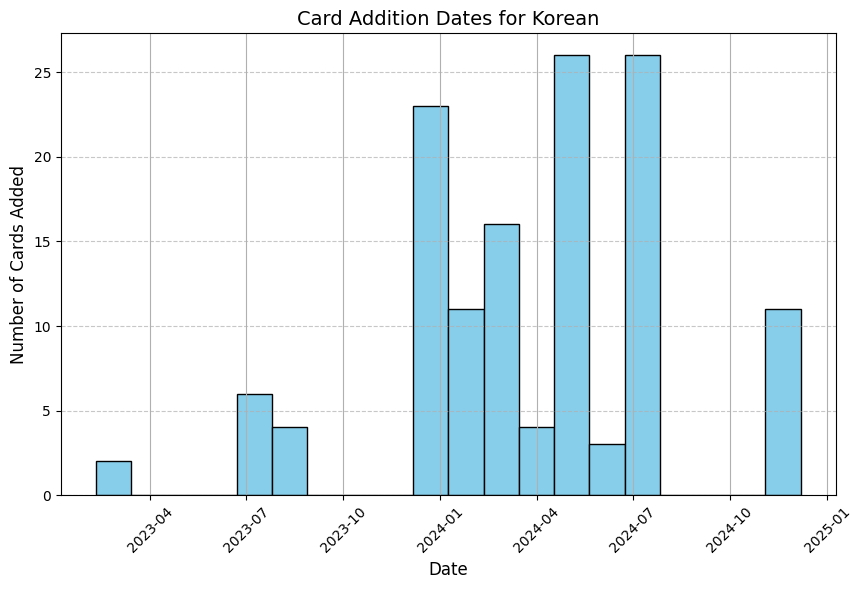

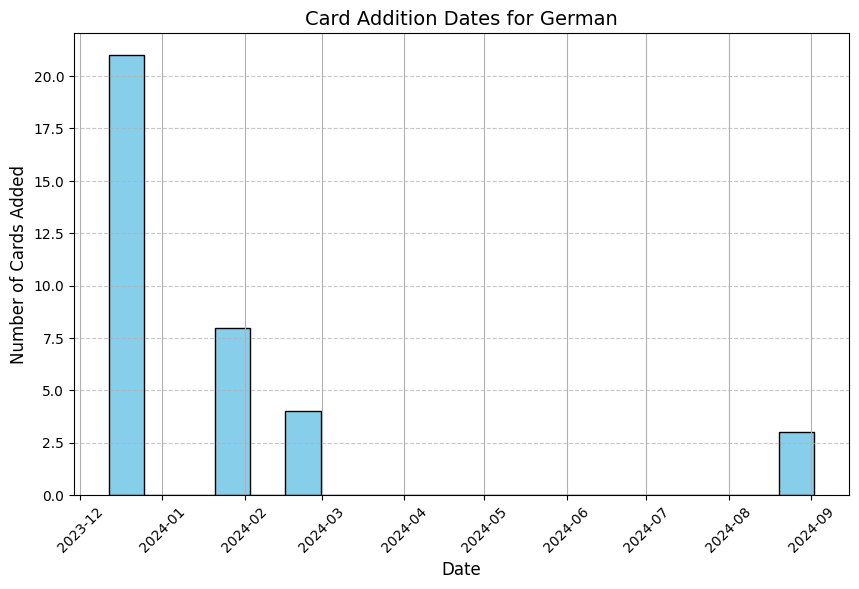

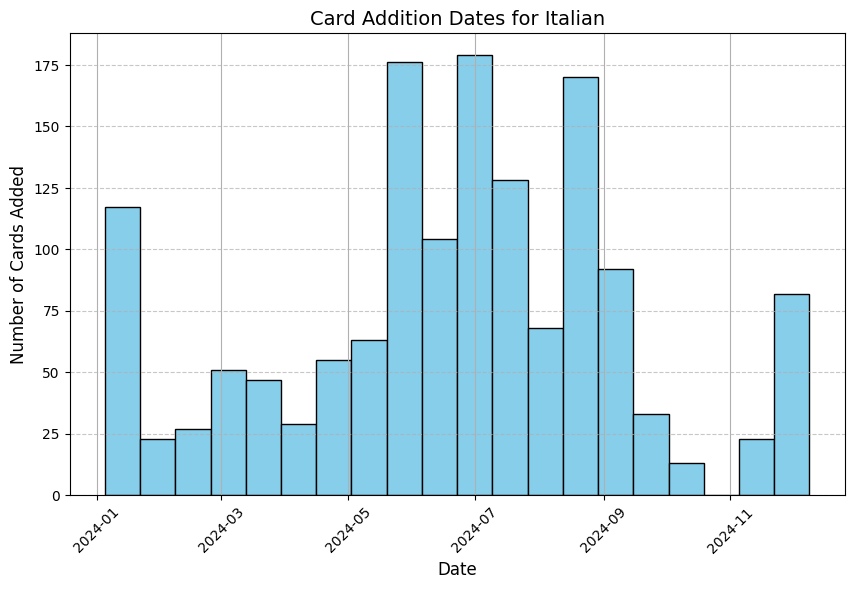

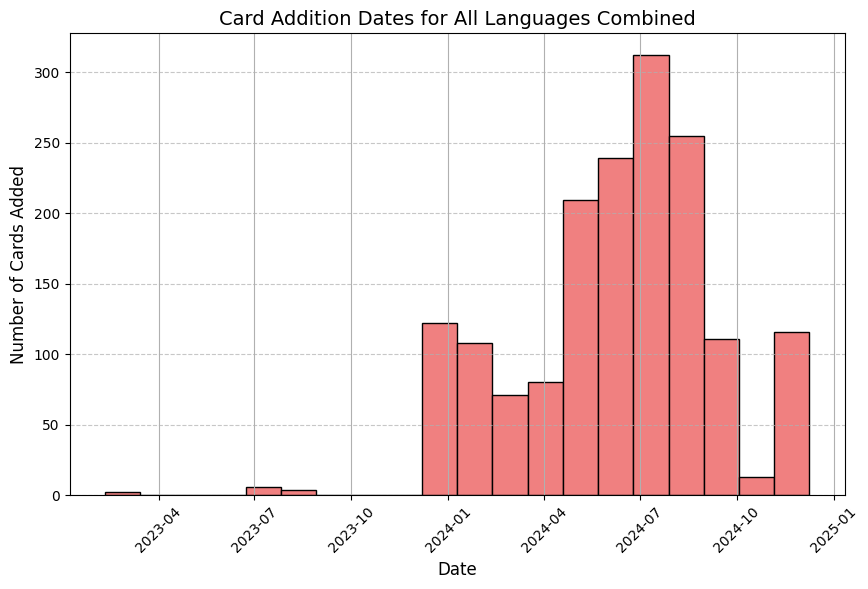

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV files with language names for better titles
csv_files = {
    "/content/kr_progress_with_pos_stanza.csv": "Korean",
    "/content/deu_progress_with_pos_stanza.csv": "German",
    "/content/ita_progress_with_pos_stanza.csv": "Italian"
}

# Separate data storage
separate_data = {}

# List to store combined data
combined_data = pd.DataFrame()

# Loop through each CSV file
for file, language in csv_files.items():
    # Read CSV
    df = pd.read_csv(file)

    # Ensure consistent column names by renaming columns if needed
    df.columns = df.columns.str.strip()

    # Ensure 'Card was added' column is correctly interpreted as datetime with error handling
    if 'Card was added' in df.columns:
        df['Card was added'] = pd.to_datetime(df['Card was added'], errors='coerce')
    else:
        print(f"Warning: 'Card was added' column not found in {file}")

    # Store separate data
    separate_data[language] = df

    # Append to combined dataframe
    combined_data = pd.concat([combined_data, df])

# Generate and display visualizations for each dataset with improved colors
for language, data in separate_data.items():
    if 'Card was added' in data.columns:
        plt.figure(figsize=(10,6))
        data['Card was added'].hist(bins=20, color='skyblue', edgecolor='black')
        plt.title(f'Card Addition Dates for {language}', fontsize=14)
        plt.xlabel('Date', fontsize=12)
        plt.ylabel('Number of Cards Added', fontsize=12)
        plt.xticks(rotation=45)
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.show()

# Combined dataset visualization
if 'Card was added' in combined_data.columns:
    plt.figure(figsize=(10,6))
    combined_data['Card was added'].hist(bins=20, color='lightcoral', edgecolor='black')
    plt.title('Card Addition Dates for All Languages Combined', fontsize=14)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Number of Cards Added', fontsize=12)
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()
